In [27]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
import numpy as np

with open('memtest.json', 'r', encoding='utf8') as jfile:
    data = json.load(jfile)

In [28]:
test_data = []
for i, test in enumerate(data, start=1):
    for file in test:
        test_data.append({'test_number': i, **file})

df = pd.DataFrame(test_data)
df.head()

,test_number,filename,filetype,memory_mb
0,1,data/small/day1/2022_place_canvas_history.parquet,parquet,4020.203125
1,1,data/small/day1/2022_place_canvas_history.orc,orc,2030.265625
2,1,data/small/day1/2022_place_canvas_history.feather,feather,1888.117188
3,1,data/small/day1/2022_place_canvas_history.csv,csv,4271.746094
4,2,data/small/day1/2022_place_canvas_history.parquet,parquet,3899.222656


In [29]:
new_df = df.groupby(['filetype']).aggregate({'memory_mb': 'mean'})
new_df.to_csv('grouped_memtest')

In [30]:
memory_df = pd.read_csv('grouped_memtest')

In [31]:
df.head()

,test_number,filename,filetype,memory_mb
0,1,data/small/day1/2022_place_canvas_history.parquet,parquet,4020.203125
1,1,data/small/day1/2022_place_canvas_history.orc,orc,2030.265625
2,1,data/small/day1/2022_place_canvas_history.feather,feather,1888.117188
3,1,data/small/day1/2022_place_canvas_history.csv,csv,4271.746094
4,2,data/small/day1/2022_place_canvas_history.parquet,parquet,3899.222656


(100, 4)
(100, 4)
(100, 4)
(100, 4)


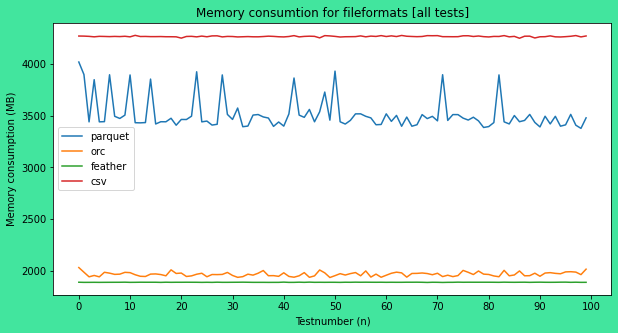

In [62]:
filetype_groups = df.groupby(['filetype'])

fig, axs = plt.subplots(1, figsize=(10, 5), facecolor='#42e59e')
axs.set_xticks(range(0, 101, 10))
axs.set_xlabel('Testnumber (n)')
axs.set_ylabel('Memory consumption (MB)')
axs.set_title('Memory consumtion for fileformats [all tests]')

for filename in ['parquet', 'orc', 'feather', 'csv']:
    file_df = filetype_groups.get_group(filename)
    print(file_df.shape)
    axs.plot(range(100), file_df['memory_mb'], label=filename, )
    axs.legend()

fig.savefig('graphs/memory_consumption_100_tests.PNG')

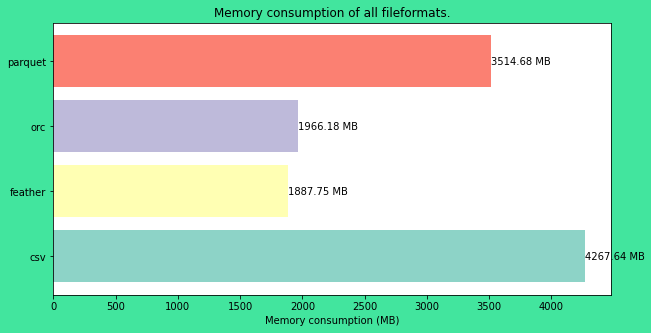

In [63]:
# High low cardinality https://www.timescale.com/blog/what-is-high-cardinality-how-do-time-series-databases-influxdb-timescaledb-compare/
fig, axs = plt.subplots(1, figsize=(10, 5), facecolor='#42e59e')

ftypes = memory_df.iloc[:, 0]
results = memory_df.iloc[:, 1]
y = np.arange(len(ftypes))
axs.set_yticks(y, ftypes)
axs.set_xlabel('Memory consumption (MB)')
bar = axs.barh(y, results, color=[cm.get_cmap('Set3')(i) for i, _ in enumerate(ftypes)])
axs.set_title('Memory consumption of all fileformats.')
labels = [f'{n} MB' for n in np.round(results, 2)]
axs.bar_label(bar, labels)

fig.savefig('graphs/mean_memory_consumptions.PNG')